Name:Abdel Rahman Omar Nawasreh 
     

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Data preprocessing

In [15]:
# load data xlsx file
df = pd.read_csv('ilpd.csv')
df

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [16]:
column_names = [
    'Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
    'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Proteins',
    'Albumin', 'Albumin_and_Globulin_Ratio', 'Selector'
]

# Reload the dataset with the column names
df = pd.read_csv('ilpd.csv',names=column_names)

# Display the first few rows to confirm it's loaded correctly
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [17]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Selector                    583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [18]:
# show the data types of each column in the dataset
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Proteins                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Selector                        int64
dtype: object

In [19]:
#show the summary statistics of the dataset
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Total_Bilirubin'}>,
        <AxesSubplot:title={'center':'Direct_Bilirubin'}>],
       [<AxesSubplot:title={'center':'Alkaline_Phosphotase'}>,
        <AxesSubplot:title={'center':'Alamine_Aminotransferase'}>,
        <AxesSubplot:title={'center':'Aspartate_Aminotransferase'}>],
       [<AxesSubplot:title={'center':'Total_Proteins'}>,
        <AxesSubplot:title={'center':'Albumin'}>,
        <AxesSubplot:title={'center':'Albumin_and_Globulin_Ratio'}>],
       [<AxesSubplot:title={'center':'Selector'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

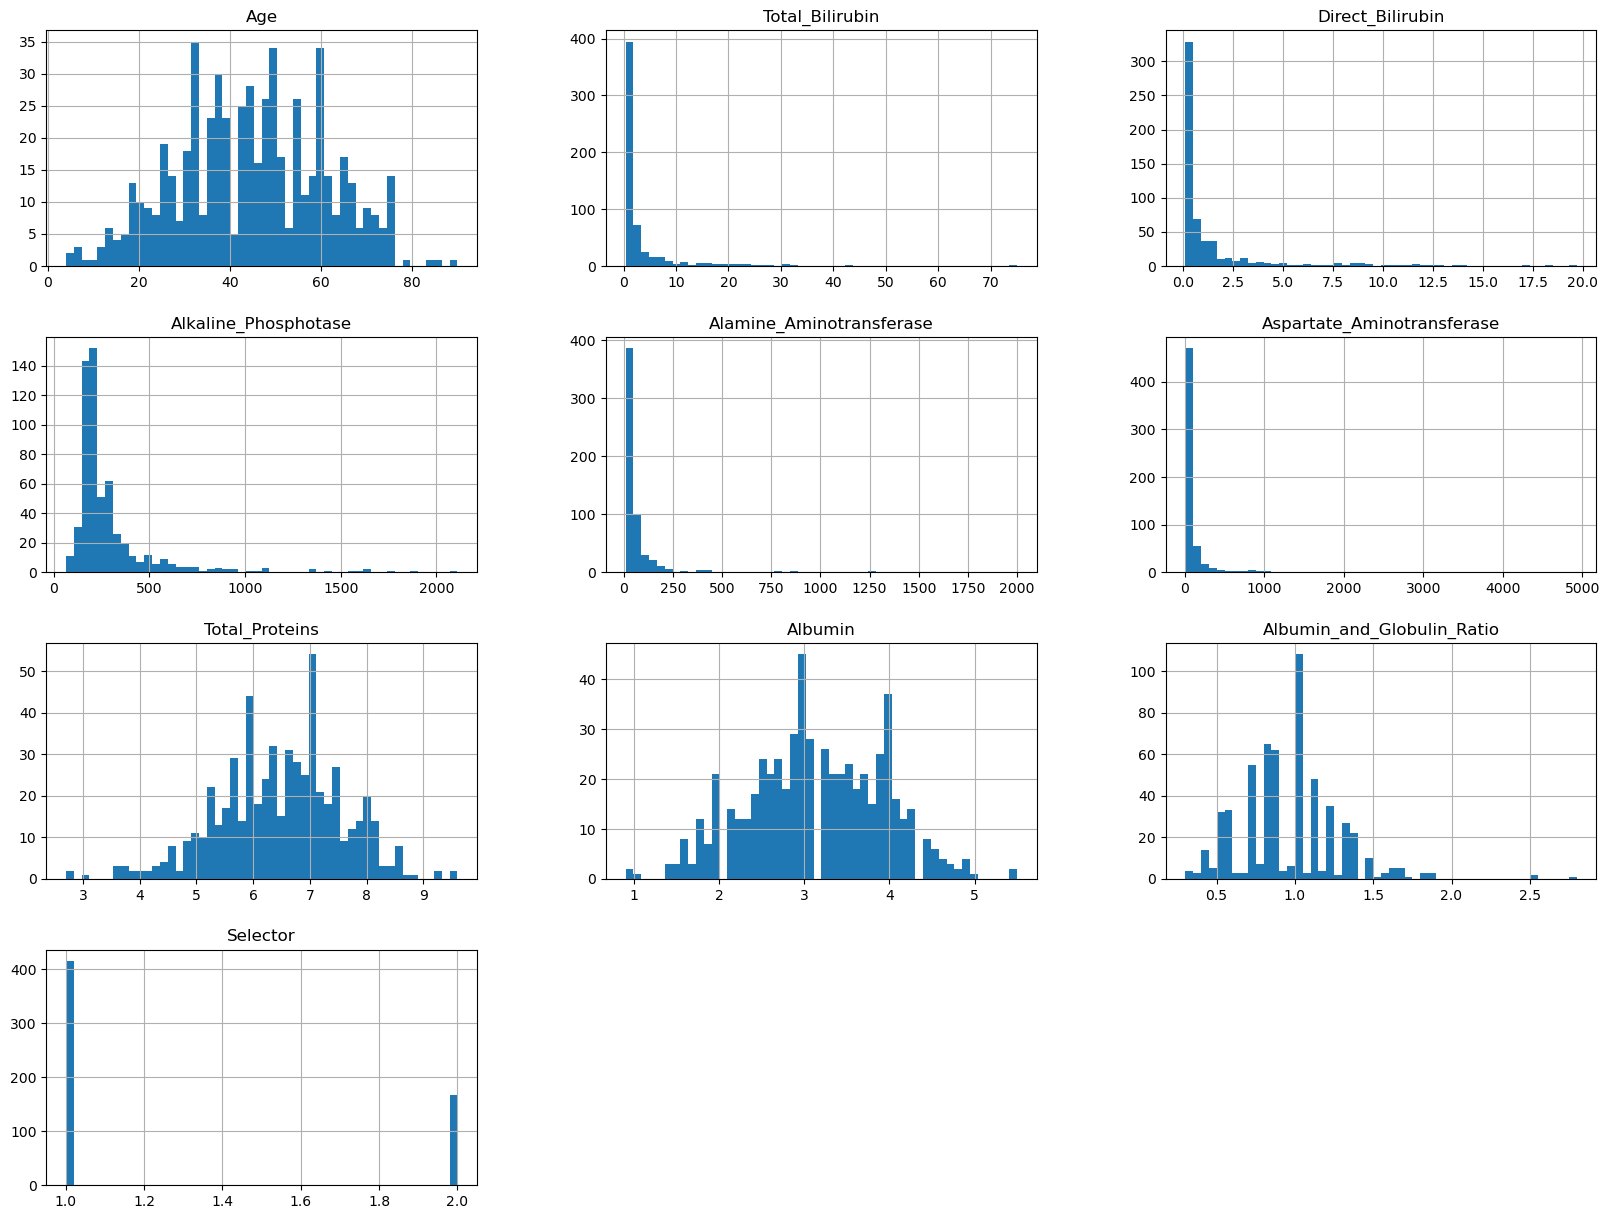

In [20]:
## plot histogram for dataset
df.hist( bins=50, figsize=(20,15))

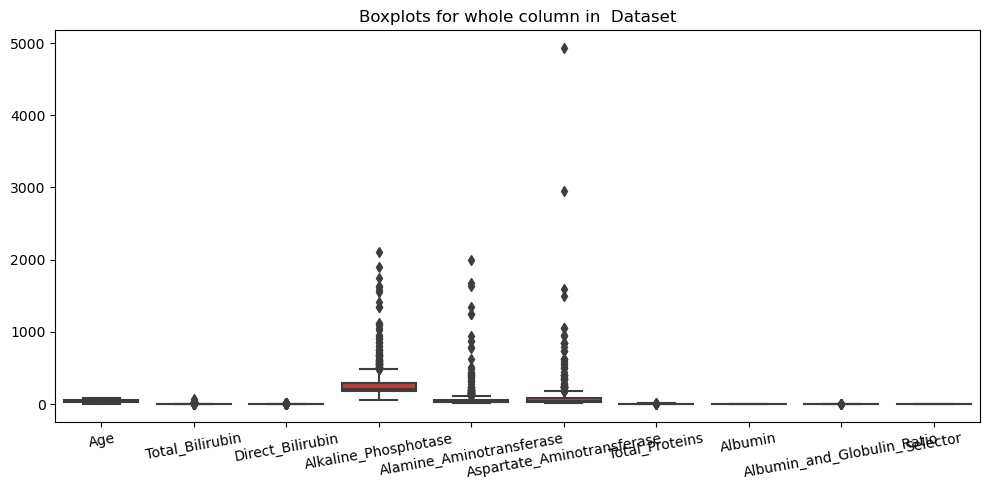

In [21]:
#figure's size for the boxplot
plt.figure(figsize=(10, 5))

# Create boxplots for dataset
sns.boxplot(data=df)

# write the title and show the plot
plt.title('Boxplots for whole column in  Dataset')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

In [22]:
# Check for missing values in whole columns of the dataset
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Selector                      0
dtype: int64

In [23]:
# Fill the missing values in the Albumin_and_Globulin_Ratio column with mean 
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [24]:
#Make sure that any missing values have been filled in
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Selector                      0
dtype: int64

In [25]:
#show the count of unique values in the Result of treatment column
df['Selector'].value_counts()

1    416
2    167
Name: Selector, dtype: int64

In [26]:
# Handle outliers:
# For demonstration, I'll use the IQR method to flag the outliers without removing them.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[outlier_condition]

/var/folders/vn/x248gnvs0p5813c7v6k4t2m80000gn/T/ipykernel_4396/3706941541.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_condition = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)


In [28]:
# Convert 'Gender' column to numerical format using label encoding
from sklearn.preprocessing import LabelEncoder
# Initialize label encoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Show the encoding for 'Gender' where Female: 0, Male: 1
gender_encoding = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

outlier_condition.shape[0], gender_encoding,
df.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Selector
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
16,38,1,1.8,0.8,342,168,441,7.6,4.4,1.30,1
18,40,0,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,0,0.9,0.3,293,232,245,6.8,3.1,0.80,1


# Exploratory Data Analysis (EDA)

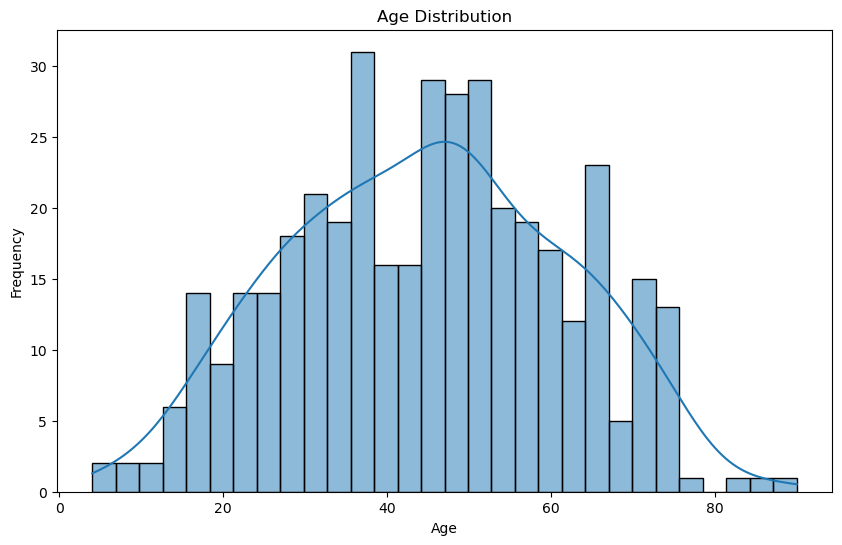

In [34]:
# Visualizing the distribution of the 'Age' feature.
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


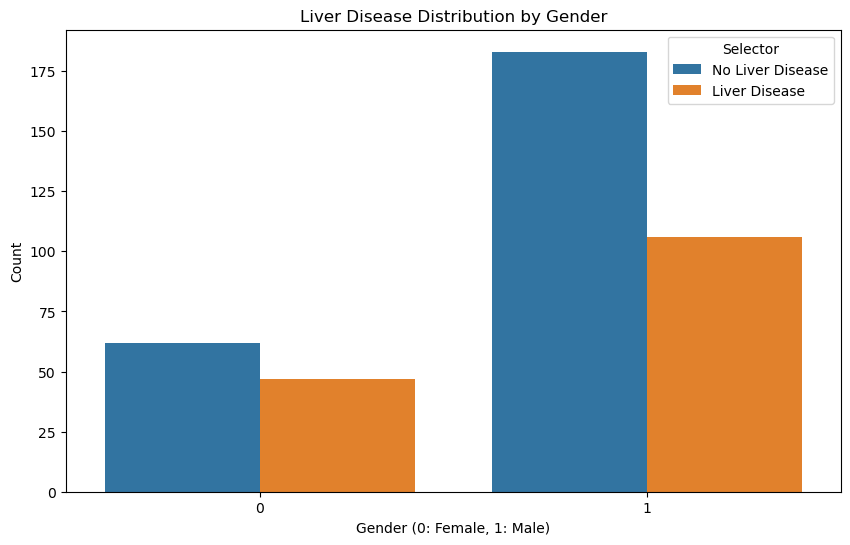

In [35]:
# Visualizing the distribution of liver disease across genders.
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Selector', data=df_no_outliers)
plt.title('Liver Disease Distribution by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Selector', labels=['No Liver Disease', 'Liver Disease'])
plt.show()

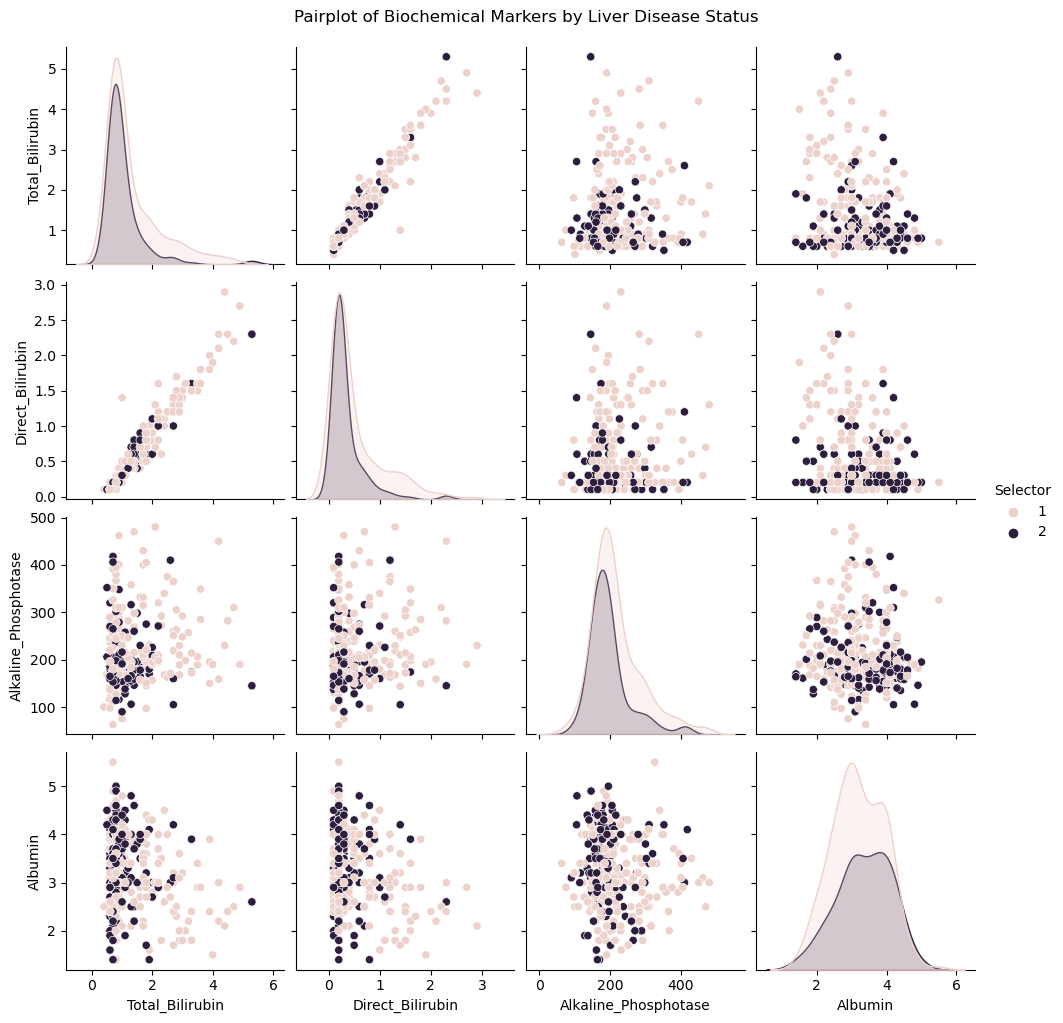

In [33]:
# Visualizing the relationship between biochemical markers and liver disease status using pairplot for a subset of features.
# Due to the large number of features, we'll select a subset that might be of interest.
subset_features = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Albumin', 'Gender', 'Selector']
sns.pairplot(df_no_outliers[subset_features], hue='Selector', vars=subset_features[:-2])
plt.suptitle('Pairplot of Biochemical Markers by Liver Disease Status', y=1.02)
plt.show()

# Model Training

In [71]:
# Define features X and target y
X = df.drop('Selector', axis=1)
y = df['Selector']

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# First model is Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 
model.fit(X_train,y_train) # Fit the model

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
# prediction for Logistic Regression model
predictions = model.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
# length of predictions made by the Logistic Regression model
len(predictions)

59

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
# Model Evaluation for Logistic Regression
## show the accuracy score for the Logistic Regression model's predictions on the test set
print(accuracy_score(y_test,predictions))
#show the classification_report for the Logistic Regression model's predictions on the test set
print(classification_report(y_test,predictions))
#show the confusion_matrix for the Logistic Regression model's predictions on the test set
print(confusion_matrix(y_test,predictions))

0.7966101694915254
              precision    recall  f1-score   support

           1       0.80      1.00      0.89        47
           2       0.00      0.00      0.00        12

    accuracy                           0.80        59
   macro avg       0.40      0.50      0.44        59
weighted avg       0.63      0.80      0.71        59

[[47  0]
 [12  0]]


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# ROC AUC for Logistic Regression
roc_auc_score(y_test, predictions)

0.5

In [47]:
# Second model is Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
# Fit the training Decision Tree model 
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
# Prediction for Decision Tree model
predictions = DT.predict(X_test)
predictions

array([1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [49]:
# length of predictions made by the Decision Tree model
len(predictions)

59

In [50]:
# Model Evaluation Decision Tree
#show the accuracy score for the  Decision Tree model's predictions on the test set
print(accuracy_score(y_test,predictions))
#show the classification_report for the  Decision Tree model's predictions on the test set
print(classification_report(y_test,predictions))
#show the confusion_matrix for the  Decision Tree model's predictions on the test set
print(confusion_matrix(y_test,predictions))

0.7627118644067796
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        47
           2       0.42      0.42      0.42        12

    accuracy                           0.76        59
   macro avg       0.63      0.63      0.63        59
weighted avg       0.76      0.76      0.76        59

[[40  7]
 [ 7  5]]


In [51]:
# ROC AUC for Decision Tree
roc_auc_score(y_test, predictions)

0.6338652482269503

In [53]:
# Third model is SVM
from sklearn import svm
svm = svm.SVC()
# Fit the training SVM model 
svm.fit(X_train, y_train)

SVC()

In [54]:
# Prediction for SVM model
predictions = svm.predict(X_test)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
## length of predictions made by the svm model
len(predictions)

59

In [56]:
# Model Evaluation for SVM
##show the accuracy score for the  svm model's predictions on the test set
print(accuracy_score(y_test,predictions))
#show the classification_report for the  svm model's predictions on the test set
print(classification_report(y_test,predictions))
#show the confusion_matrix for the  svm model's predictions on the test set
print(confusion_matrix(y_test,predictions))

0.7966101694915254
              precision    recall  f1-score   support

           1       0.80      1.00      0.89        47
           2       0.00      0.00      0.00        12

    accuracy                           0.80        59
   macro avg       0.40      0.50      0.44        59
weighted avg       0.63      0.80      0.71        59

[[47  0]
 [12  0]]


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
## ROC AUC for SVM
roc_auc_score(y_test, predictions)

0.5

# More visualizations

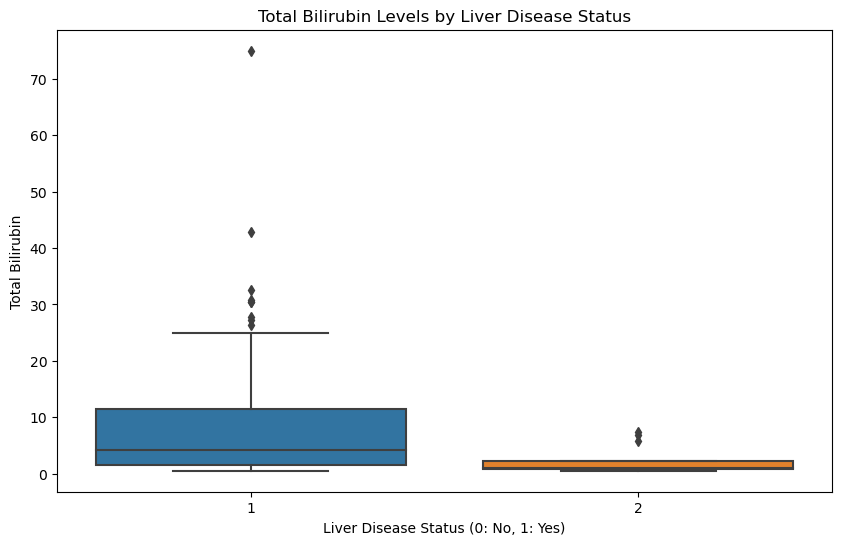

In [29]:
# Boxplot for Total Bilirubin levels by liver disease status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Selector', y='Total_Bilirubin', data=df)
plt.title('Total Bilirubin Levels by Liver Disease Status')
plt.xlabel('Liver Disease Status (0: No, 1: Yes)')
plt.ylabel('Total Bilirubin')
plt.show()

The distributions of total bilirubin levels in persons with liver illness (Selector 1) and those without (Selector 0) are contrasted in the boxplot above.

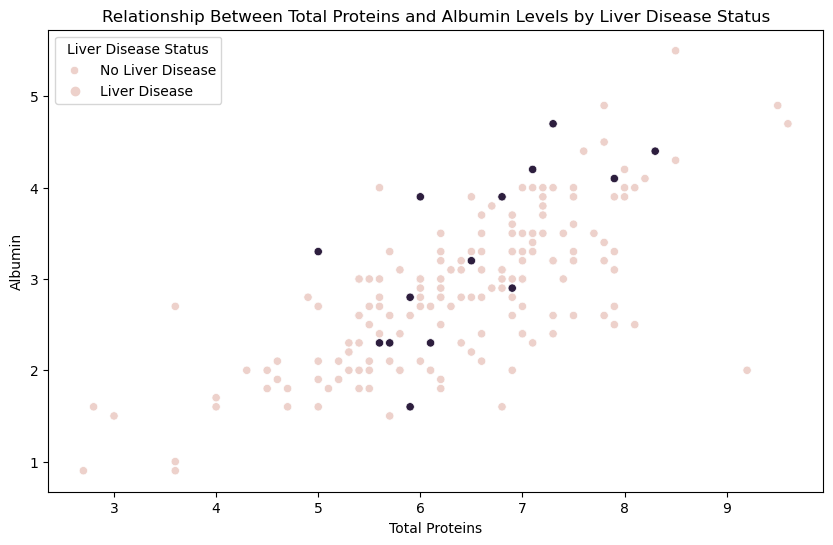

In [31]:
# Scatter plot for Total Proteins vs. Albumin levels, colored by liver disease status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Proteins', y='Albumin', hue='Selector', data=df)
plt.title('Relationship Between Total Proteins and Albumin Levels by Liver Disease Status')
plt.xlabel('Total Proteins')
plt.ylabel('Albumin')
plt.legend(title='Liver Disease Status', labels=['No Liver Disease', 'Liver Disease'])
plt.show()

The link between total proteins and albumin levels is depicted in the scatter plot above, where the data points are colored according to the severity of liver disease. Finding trends or connections between these two biochemical indicators and the existence of liver disease may be made easier with the use of this depiction.

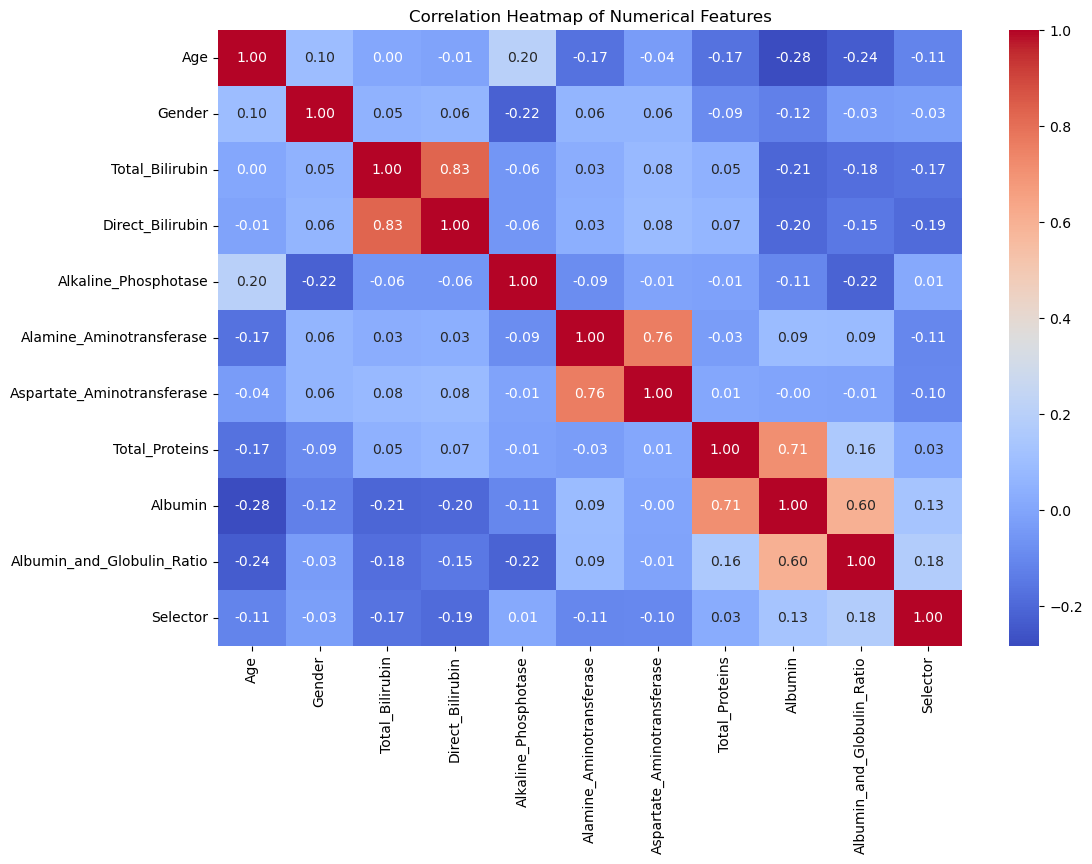

In [32]:
# Heatmap for the correlation between numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

The correlation coefficients between each of the dataset's numerical elements are shown in the heatmap above, giving viewers an understanding of the relationships between the various variables.

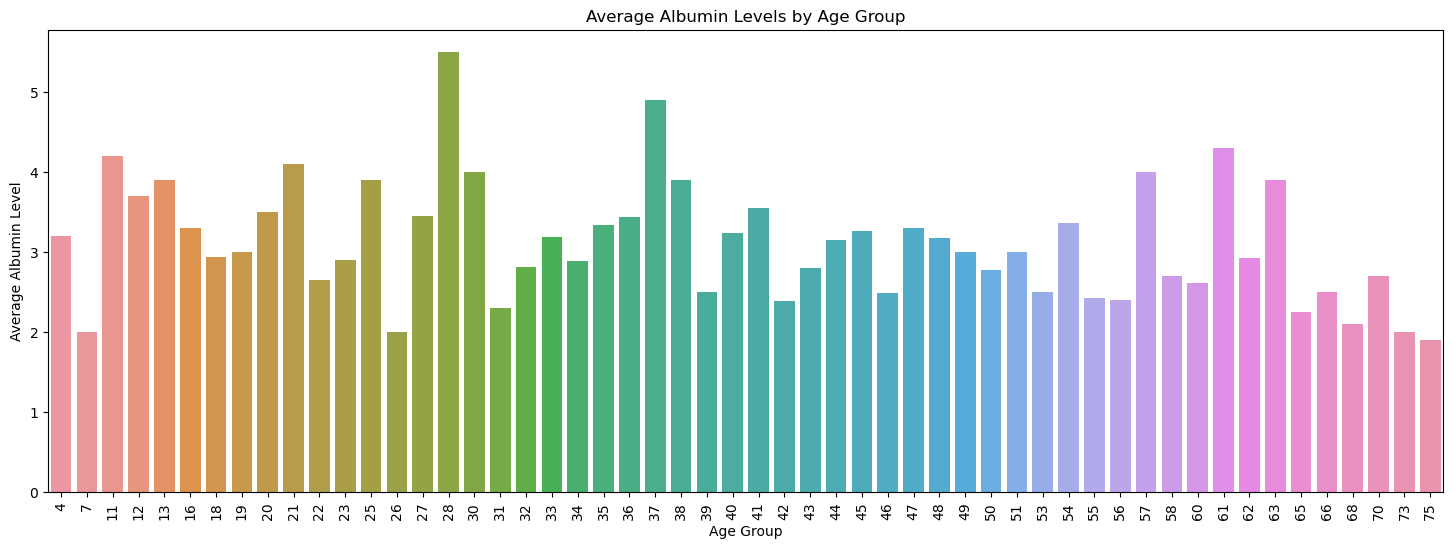

In [33]:
# Grouping the data by age to calculate the mean Albumin level for each age group
age_albumin_means = df.groupby('Age')['Albumin'].mean().reset_index()

# Visualization 5: Bar plot for average Albumin levels for each age group
plt.figure(figsize=(18, 6))  # Set figure size to be wider to accommodate all age groups
sns.barplot(x='Age', y='Albumin', data=age_albumin_means)
plt.title('Average Albumin Levels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Albumin Level')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

The average albumin levels for each age group are displayed on a bar plot, which makes it possible to see patterns or trends across several age groups.

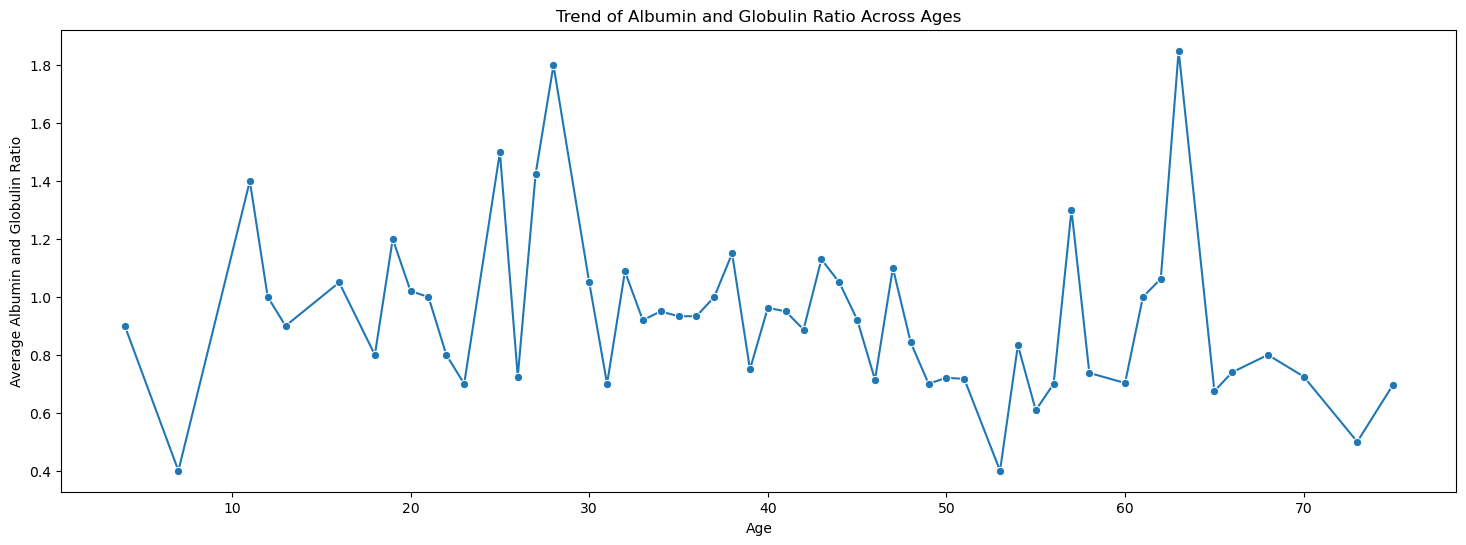

In [34]:
# Grouping the data by age to calculate the mean Albumin and Globulin Ratio for each age group
age_ag_ratio_means = df.groupby('Age')['Albumin_and_Globulin_Ratio'].mean().reset_index()

# Visualization 6: Line plot for the trend of Albumin and Globulin Ratio across different ages
plt.figure(figsize=(18, 6))  # Set figure size to be wider to accommodate all age groups
sns.lineplot(x='Age', y='Albumin_and_Globulin_Ratio', data=age_ag_ratio_means, marker='o')
plt.title('Trend of Albumin and Globulin Ratio Across Ages')
plt.xlabel('Age')
plt.ylabel('Average Albumin and Globulin Ratio')
plt.show()

With the mean ratio drawn for each age group, the line plot shows the trend of the albumin and globulin ratios over time. It is simpler to follow the trend when the average ratio at each age is highlighted by the plot's markers.